# Problem 2 for HW 4

Projected gradient descent version of Problem 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import generator as gen
import optimizer as opt
import numpy as np
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
kappa = 100
n = 20
d = 5
A = gen.generate_A(n, d)
alpha = 1
sigma = 1

tracking_errs = opt.gradient_descent_experiment(A, alpha, n, d, sigma, iters=50, projected=True)

In [4]:
rho = np.abs(1 - alpha/kappa)
err0 = np.linalg.norm(tracking_errs[0])

bounds = [rho**t * err0 + (1 - rho**t)/(1-rho) for t in range(len(tracking_errs))]

In [5]:
rho, 1/(1-rho)

(0.99, 99.99999999999991)

Text(0, 0.5, '$||x_t - x_t^*||_2$')

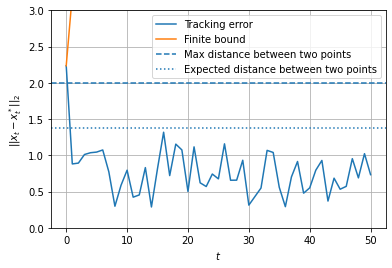

In [10]:
plt.plot(range(len(tracking_errs)), tracking_errs, label="Tracking error")
plt.plot(range(len(tracking_errs)), bounds, label="Finite bound")
#plt.axhline(1/(1-rho), linestyle='--', label="Asymptotic bound")
plt.axhline(2, linestyle='--', label="Max distance between two points")
plt.axhline(1.3796796759881553, linestyle=':', label="Expected distance between two points")
plt.grid()
plt.ylim([0, 3])
plt.legend()

plt.xlabel("$t$")
plt.ylabel("$||x_t - x_t^*||_2$")